In [1]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
training = pd.read_csv('train.csv')

In [3]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182080 entries, 0 to 182079
Data columns (total 16 columns):
id                                              182080 non-null object
teacher_id                                      182080 non-null object
teacher_prefix                                  182076 non-null object
school_state                                    182080 non-null object
project_submitted_datetime                      182080 non-null object
project_grade_category                          182080 non-null object
project_subject_categories                      182080 non-null object
project_subject_subcategories                   182080 non-null object
project_title                                   182080 non-null object
project_essay_1                                 182080 non-null object
project_essay_2                                 182080 non-null object
project_essay_3                                 6374 non-null object
project_essay_4                        

In [4]:
training['project_submitted_datetime'] = pd.to_datetime(training['project_submitted_datetime'])

In [5]:
training['project_is_approved'].value_counts()

1    154346
0     27734
Name: project_is_approved, dtype: int64

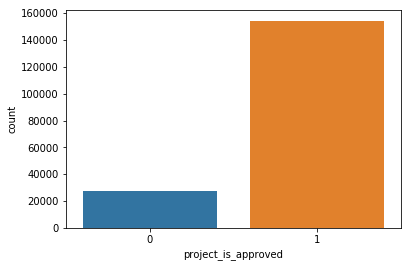

In [6]:
sns.countplot(x='project_is_approved', data=training)
plt.show()

In [7]:
training.describe()

,teacher_number_of_previously_posted_projects,project_is_approved
count,182080.000000,182080.000000
mean,11.237055,0.847682
std,28.016086,0.359330
min,0.000000,0.000000
25%,0.000000,1.000000
50%,2.000000,1.000000
75%,9.000000,1.000000
max,451.000000,1.000000


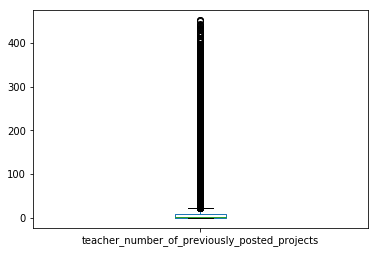

In [8]:
training['teacher_number_of_previously_posted_projects'].plot.box()

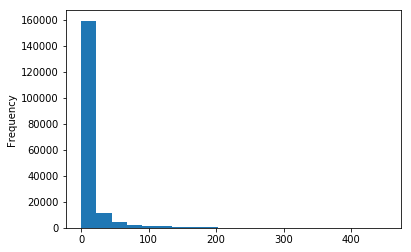

In [9]:
training['teacher_number_of_previously_posted_projects'].plot.hist(bins=20)

C:\Users\mcassi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


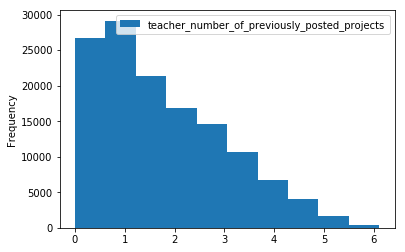

In [10]:
log_project = pd.DataFrame(np.log(training[['teacher_number_of_previously_posted_projects']]))

log_project[log_project['teacher_number_of_previously_posted_projects'] != -float('inf')].plot.hist(bins=10)
plt.show()

In [11]:
training['teacher_number_of_previously_posted_projects'].mean(), training['teacher_number_of_previously_posted_projects'].std()

(11.237055140597539, 28.01608601938684)

In [12]:
11.23 + (28.02 * 2)

67.27

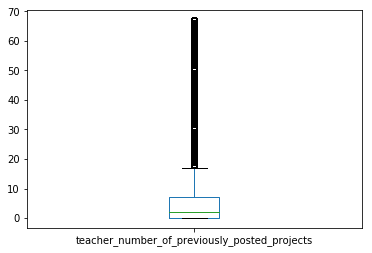

In [13]:
training[training['teacher_number_of_previously_posted_projects'] < 67.27]['teacher_number_of_previously_posted_projects'].plot.box()

In [14]:
training = training[training['teacher_number_of_previously_posted_projects'] < 67.27]

In [15]:
training['teacher_number_of_previously_posted_projects'].describe()

count    175379.000000
mean          6.835625
std          11.533715
min           0.000000
25%           0.000000
50%           2.000000
75%           7.000000
max          67.000000
Name: teacher_number_of_previously_posted_projects, dtype: float64

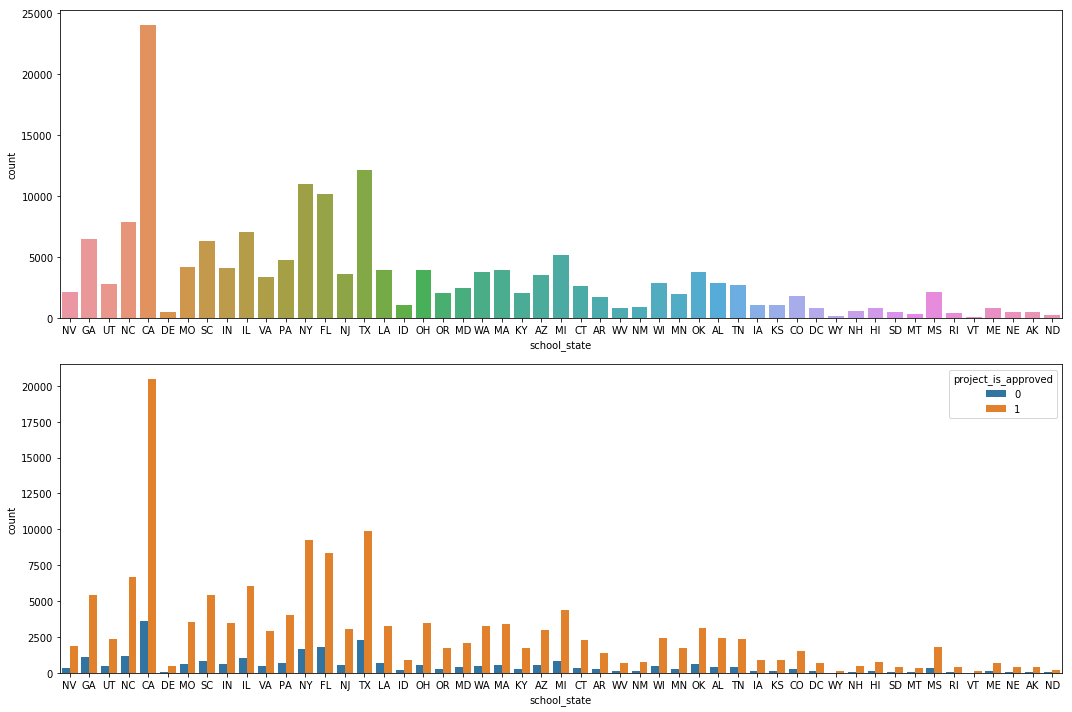

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.countplot(x='school_state', data=training)

plt.subplot(2,1,2)
sns.countplot(x='school_state', hue='project_is_approved', data=training)

plt.tight_layout()
plt.show()

In [17]:
state = pd.pivot_table(training, index='school_state', columns='project_is_approved', values='id', aggfunc=len)

In [18]:
state['per_rejected'] = (state[0]) / (state[0] + state[1])
state['per_approved'] = (state[1]) / (state[0] + state[1])

In [19]:
state['per_approved_total'] = (state[1]) / (state[1].sum(axis=0))

In [20]:
state['per_rejected_total'] = (state[0]) / (state[0].sum(axis=0))

In [23]:
state

project_is_approved,0,1,per_rejected,per_approved,per_approved_total,per_rejected_total
school_state,,,,,,
AK,83,424,0.163708,0.836292,0.002863,0.003043
AL,443,2436,0.153873,0.846127,0.016448,0.016243
AR,295,1414,0.172616,0.827384,0.009547,0.010816
AZ,570,2992,0.160022,0.839978,0.020202,0.020899
CA,3583,20465,0.148994,0.851006,0.138179,0.131371
CO,286,1545,0.156199,0.843801,0.010432,0.010486
CT,351,2321,0.131362,0.868638,0.015671,0.012869
DC,163,692,0.190643,0.809357,0.004672,0.005976
DE,62,478,0.114815,0.885185,0.003227,0.002273


In [24]:
training['teacher_prefix'].value_counts()

Mrs.       92153
Ms.        62537
Mr.        16794
Teacher     3865
Dr.           26
Name: teacher_prefix, dtype: int64

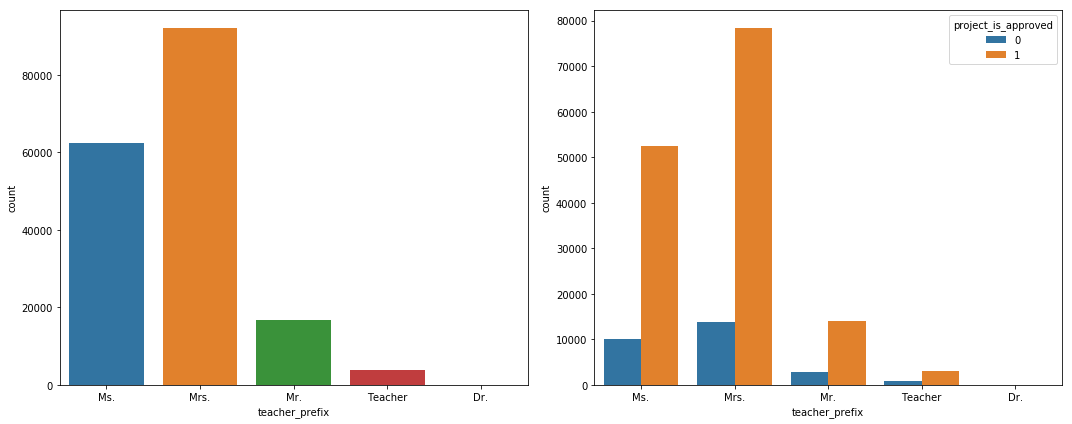

In [25]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(x='teacher_prefix', data=training)

plt.subplot(1,2,2)
sns.countplot(x='teacher_prefix', hue='project_is_approved', data=training)

plt.tight_layout()
plt.show()

In [28]:
teacher = pd.pivot_table(training, index='teacher_prefix', columns='project_is_approved', values='id', aggfunc=len)

In [29]:
teacher['per_rejected'] = (teacher[0]) / (teacher[0] + teacher[1])
teacher['per_approved'] = (teacher[1]) / (teacher[0] + teacher[1])
teacher['per_approved_total'] = (teacher[1]) / ( teacher[1].sum(axis=0))
teacher['per_rejected_total'] = (teacher[0]) / (teacher[0].sum(axis=0))

In [30]:
teacher

project_is_approved,0,1,per_rejected,per_approved,per_approved_total,per_rejected_total
teacher_prefix,,,,,,
Dr.,5,21,0.192308,0.807692,0.000142,0.000183
Mr.,2731,14063,0.162618,0.837382,0.094955,0.100132
Mrs.,13713,78440,0.148807,0.851193,0.529639,0.502787
Ms.,10025,52512,0.160305,0.839695,0.354569,0.367566
Teacher,800,3065,0.206986,0.793014,0.020695,0.029332


In [31]:
training['project_grade_category'].value_counts()

Grades PreK-2    70905
Grades 3-5       59626
Grades 6-8       27117
Grades 9-12      17731
Name: project_grade_category, dtype: int64

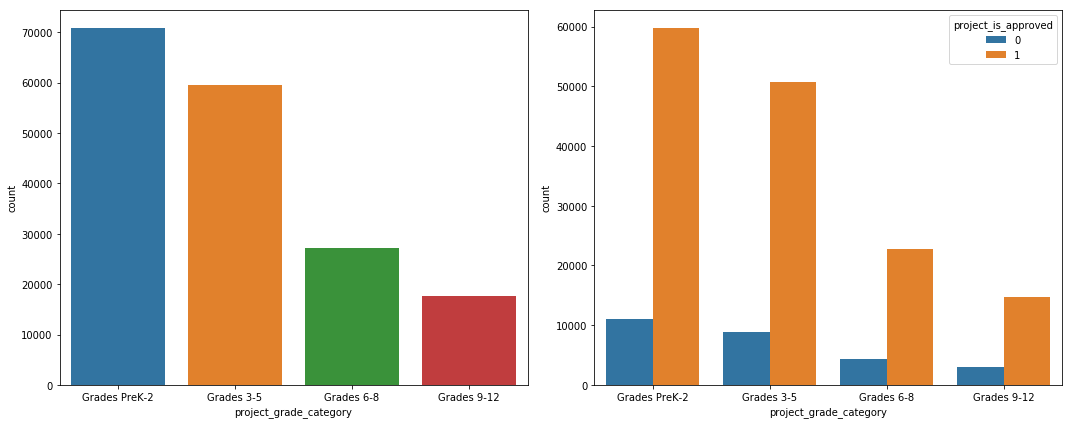

In [32]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(x='project_grade_category', data=training)

plt.subplot(1,2,2)
sns.countplot(x='project_grade_category', hue='project_is_approved', data=training)

plt.tight_layout()
plt.show()

In [33]:
grade = pd.pivot_table(training, index='project_grade_category', columns='project_is_approved', values='id', aggfunc=len)

In [35]:
grade['per_rejected'] = (grade[0]) / (grade[0] + grade[1])
grade['per_approved'] = (grade[1]) / (grade[0] + grade[1])
grade['per_approved_total'] = (grade[1]) / ( grade[1].sum(axis=0))
grade['per_rejected_total'] = (grade[0]) / (grade[0].sum(axis=0))

In [36]:
grade

project_is_approved,0,1,per_rejected,per_approved,per_approved_total,per_rejected_total
project_grade_category,,,,,,
Grades 3-5,8874,50752,0.148828,0.851172,0.342676,0.325365
Grades 6-8,4333,22784,0.159789,0.840211,0.153837,0.158869
Grades 9-12,2966,14765,0.167278,0.832722,0.099693,0.108748
Grades PreK-2,11101,59804,0.156562,0.843438,0.403795,0.407018


In [37]:
training['project_subject_categories'].value_counts()

Literacy & Language                           38332
Math & Science                                27518
Literacy & Language, Math & Science           24003
Health & Sports                               15935
Music & The Arts                               8197
Special Needs                                  6919
Literacy & Language, Special Needs             6456
Applied Learning                               6118
Math & Science, Literacy & Language            3664
Applied Learning, Literacy & Language          3602
History & Civics                               2960
Math & Science, Special Needs                  2911
Literacy & Language, Music & The Arts          2671
Math & Science, Music & The Arts               2481
Applied Learning, Special Needs                2412
Health & Sports, Special Needs                 2297
History & Civics, Literacy & Language          2214
Math & Science, Applied Learning               1958
Warmth, Care & Hunger                          1889
Applied Lear

In [38]:
training['project_subject_categories'].unique()

array(['Literacy & Language', 'Music & The Arts, Health & Sports',
       'Math & Science, Literacy & Language', 'Health & Sports',
       'Applied Learning, Literacy & Language', 'Math & Science',
       'Literacy & Language, Math & Science', 'Special Needs',
       'Applied Learning, Special Needs',
       'Applied Learning, Music & The Arts',
       'Math & Science, Special Needs', 'Health & Sports, Special Needs',
       'Literacy & Language, History & Civics',
       'Health & Sports, Literacy & Language', 'Music & The Arts',
       'Literacy & Language, Special Needs',
       'Special Needs, Music & The Arts', 'History & Civics',
       'Math & Science, Applied Learning',
       'Literacy & Language, Music & The Arts',
       'Math & Science, Music & The Arts',
       'History & Civics, Special Needs',
       'History & Civics, Literacy & Language', 'Applied Learning',
       'Math & Science, History & Civics',
       'Applied Learning, Math & Science',
       'Health & Sports, A

In [39]:
len(training['project_subject_categories'].unique())

51

In [40]:
training['project_subject_subcategories'].value_counts()

Literacy                                        15459
Literacy, Mathematics                           13613
Literature & Writing, Mathematics                9749
Literacy, Literature & Writing                   9008
Mathematics                                      8872
Literature & Writing                             7276
Special Needs                                    6919
Health & Wellness                                5646
Applied Sciences, Mathematics                    5444
Literacy, Special Needs                          3939
Applied Sciences                                 3932
Gym & Fitness, Health & Wellness                 3575
Visual Arts                                      3540
ESL, Literacy                                    3534
Music                                            2359
Literature & Writing, Special Needs              2178
Health & Wellness, Special Needs                 1988
Mathematics, Special Needs                       1897
Warmth, Care & Hunger       

In [41]:
training['project_subject_categories'] = training['project_subject_categories'].str.replace('Warmth, Care & Hunger', 'Warmth Care & Hunger')

In [42]:
training['project_subject_subcategories'] = training['project_subject_subcategories'].str.replace('Warmth, Care & Hunger', 'Warmth Care & Hunger')

In [43]:
training['project_subject_subcategories'].value_counts()

Literacy                                        15459
Literacy, Mathematics                           13613
Literature & Writing, Mathematics                9749
Literacy, Literature & Writing                   9008
Mathematics                                      8872
Literature & Writing                             7276
Special Needs                                    6919
Health & Wellness                                5646
Applied Sciences, Mathematics                    5444
Literacy, Special Needs                          3939
Applied Sciences                                 3932
Gym & Fitness, Health & Wellness                 3575
Visual Arts                                      3540
ESL, Literacy                                    3534
Music                                            2359
Literature & Writing, Special Needs              2178
Health & Wellness, Special Needs                 1988
Mathematics, Special Needs                       1897
Warmth Care & Hunger        

In [44]:
training['project_subject_categories'] = list(training['project_subject_categories'].str.split(r', '))

In [45]:
training['project_subject_categories'][3]

['Health & Sports']

In [46]:
training1 = training['project_subject_categories'].apply(collections.Counter)
training1 = pd.DataFrame.from_records(training1).fillna(value=0)

In [47]:
training['project_subject_subcategories'] = list(training['project_subject_subcategories'].str.split(r', '))

In [48]:
training['project_subject_subcategories'][2]

['Applied Sciences', 'Literature & Writing']

In [49]:
training2 = training['project_subject_subcategories'].apply(collections.Counter)
training2 = pd.DataFrame.from_records(training2).fillna(value=0)

In [50]:
training = training.merge(training1, how='left', left_index=True, right_index=True)

In [51]:
training = training.merge(training2, how='left', left_index=True, right_index=True)

In [52]:
training.drop(['project_subject_subcategories', 'project_subject_categories'], 1, inplace=True)

In [53]:
training.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,...,Music,Nutrition Education,Other,Parent Involvement,Performing Arts,Social Sciences,Special Needs_y,Team Sports,Visual Arts,Warmth Care & Hunger_y
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
